<a href="https://colab.research.google.com/github/AqilulMuttaqin/PCVK_Genap_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Muhammad Aqilul Muttaqin**

**NIM: 2141720182**

**Kelas: TI-3B**


---



## Object Detection

Metode yang digunakan:

1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [1]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


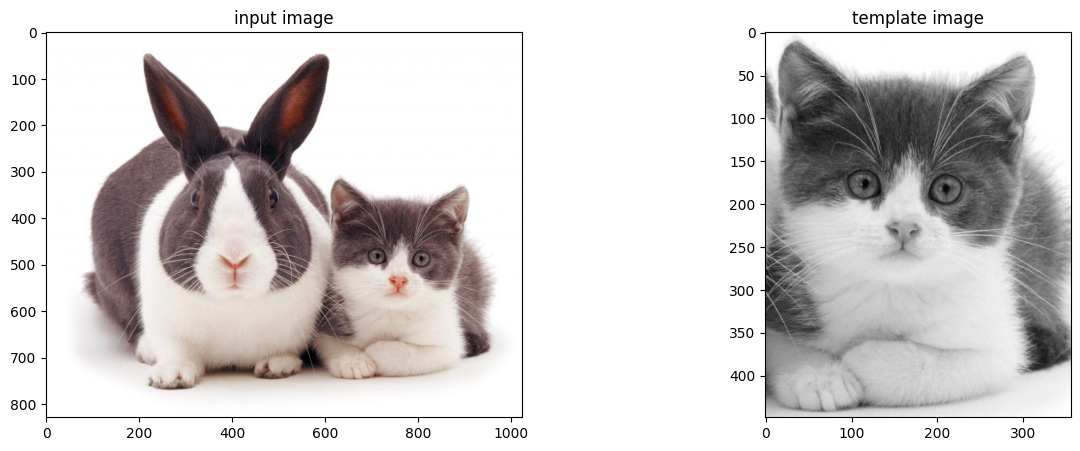

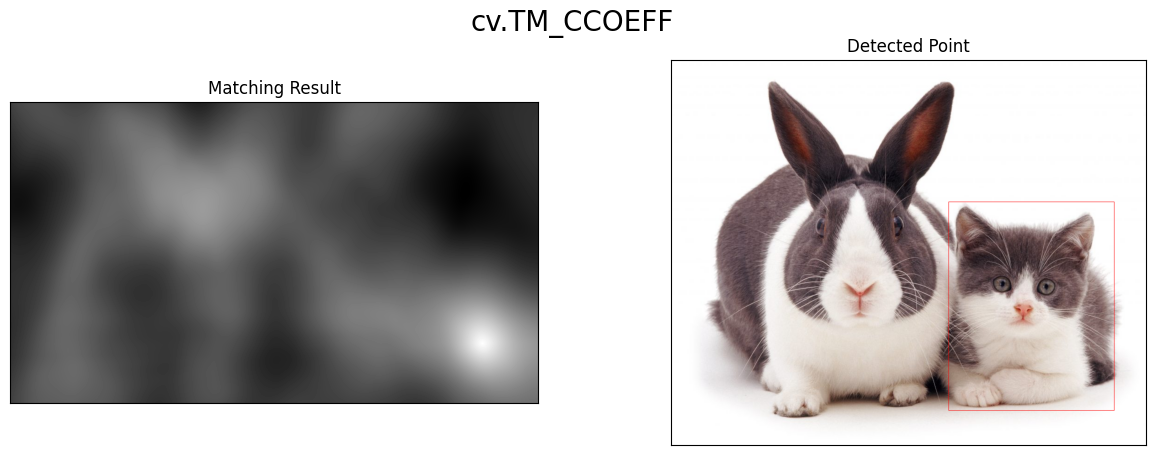

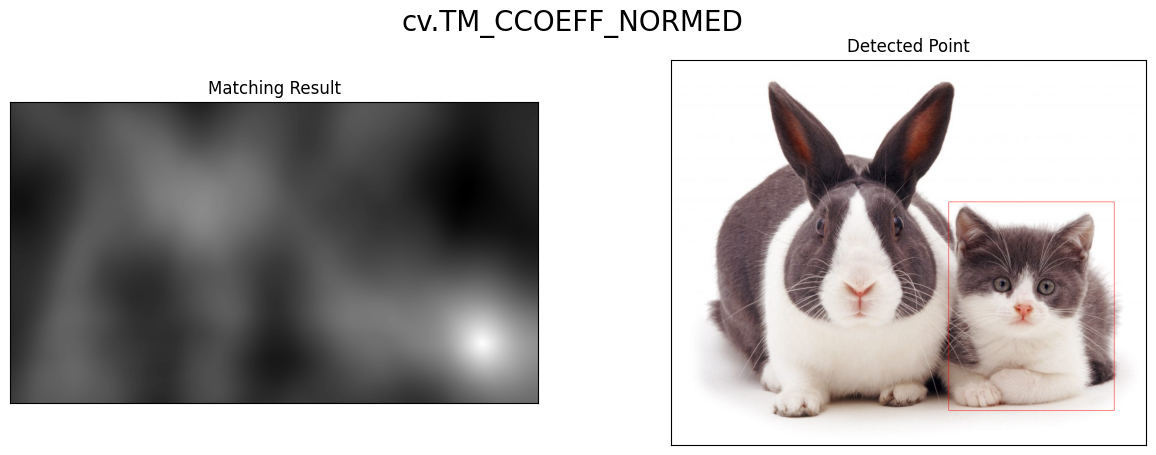

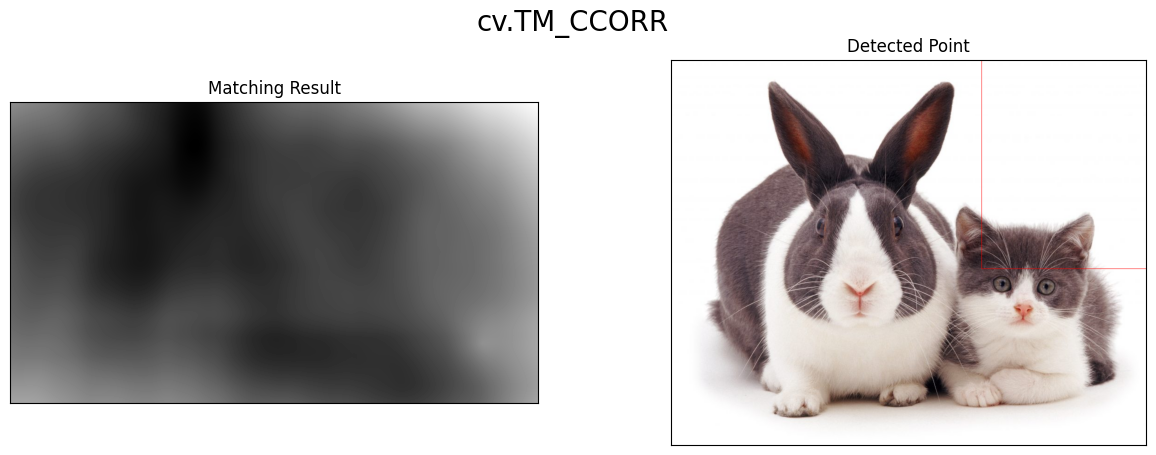

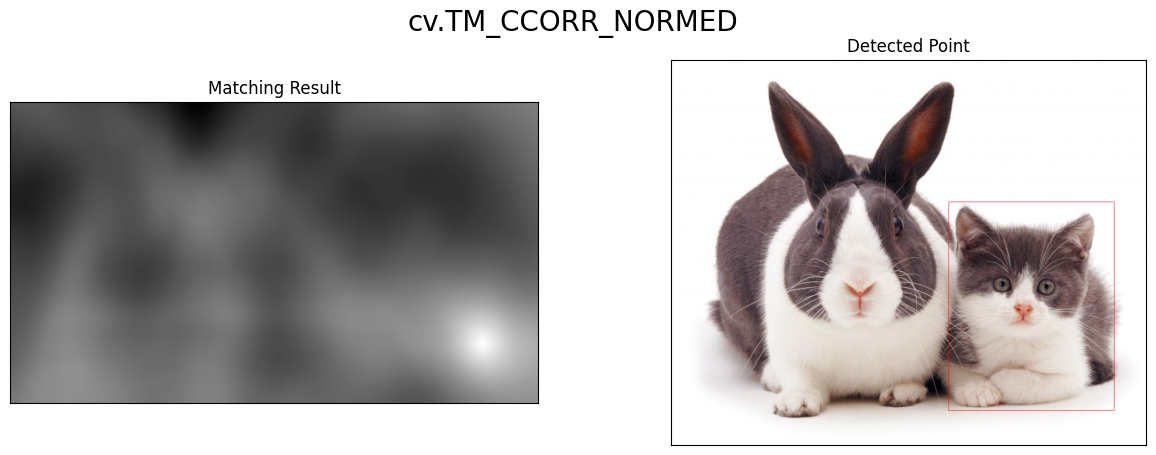

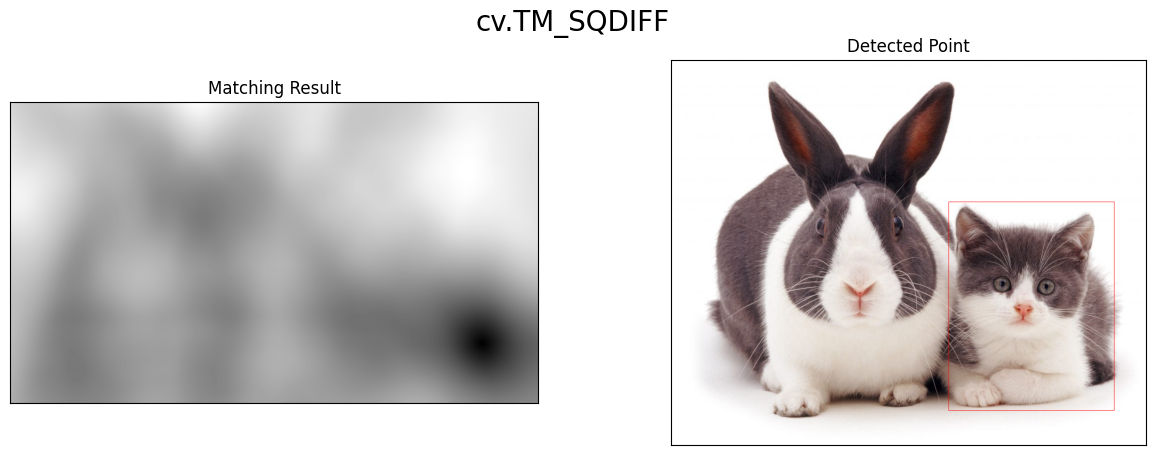

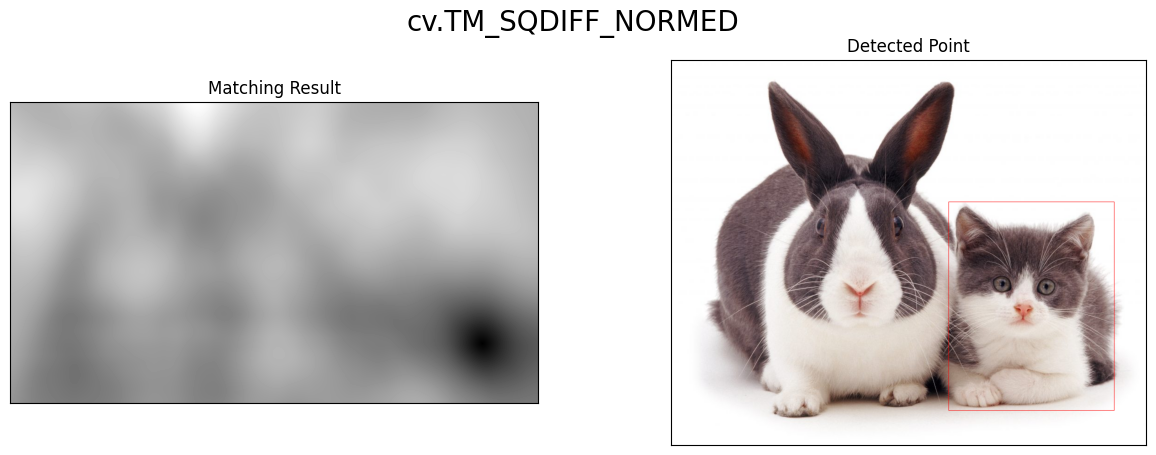

In [3]:
# Nomor 2
img = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth, fontsize=20)
    plt.show()

total objects found  6


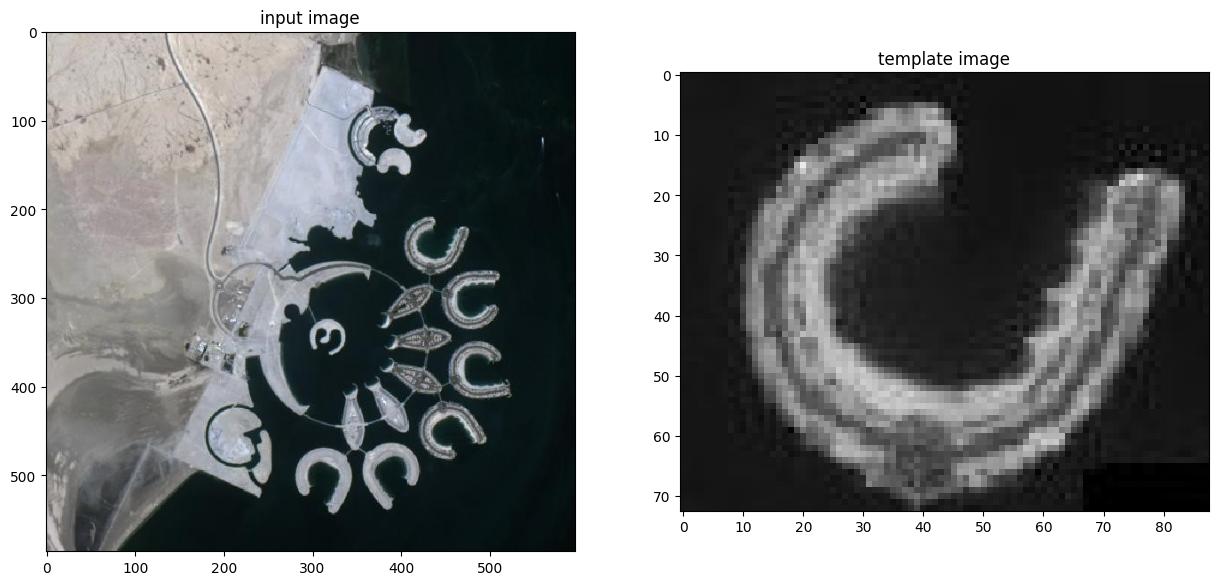

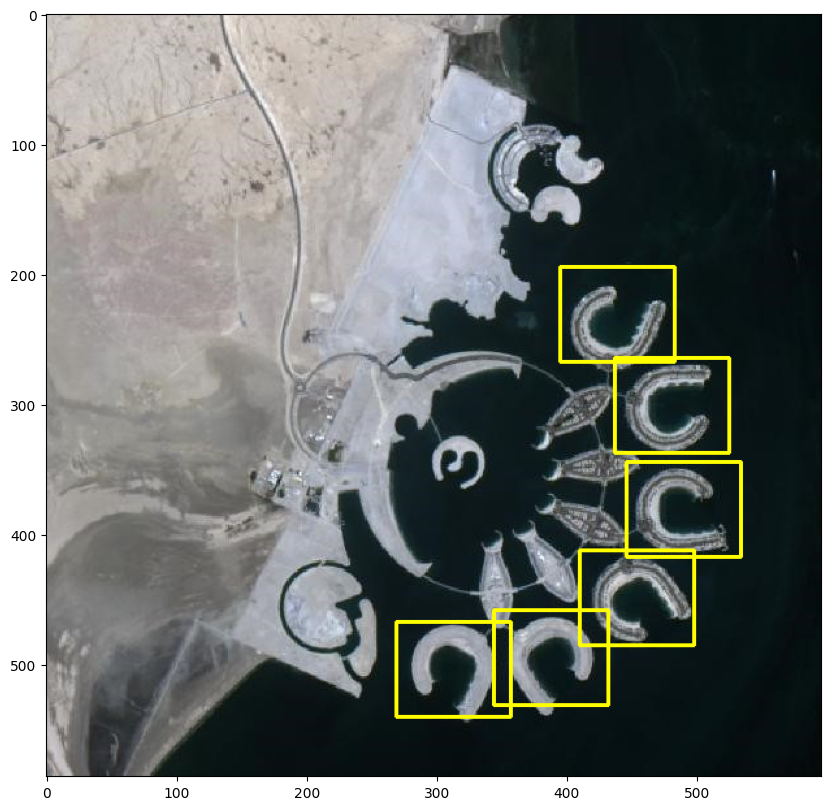

In [12]:
# Nomor 3
img3 = cv.imread('/content/drive/MyDrive/PCVK/bahrain.jpg')
img_gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/bahrain-template.jpg',0)
#dimensi citra
w, h = template.shape[::-1]

f, axarr = plt.subplots(1,2,figsize=(15,35)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

res = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)

threshold = 0.45
loc = np.where( res >= threshold)

#membuat 2 list untuk menampung koordinat x,y dan variable count untuk menampung jumlah objek
lspoint=[]
lspoint2=[]
count = 0

for pt in zip(*loc[::-1]):
	#cek apakah koordinat sudah terdapat pada list, jika sudah.. skip
	if pt[0] not in lspoint and pt[1] not in lspoint2:
		##menggambar kotak batas
		cv.rectangle(img3, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
		for i in range(((pt[0])-9), ((pt[0])+9),1):
			#masukkan koordinat x
			lspoint.append(i)
		for k in range(((pt[1])-9), ((pt[1])+9),1):
			#masukkan koordinat y
			lspoint2.append(k)
		count+=1
	else:
		continue
print ("total objects found ", count)

plt.figure(figsize=(10, 45))
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))

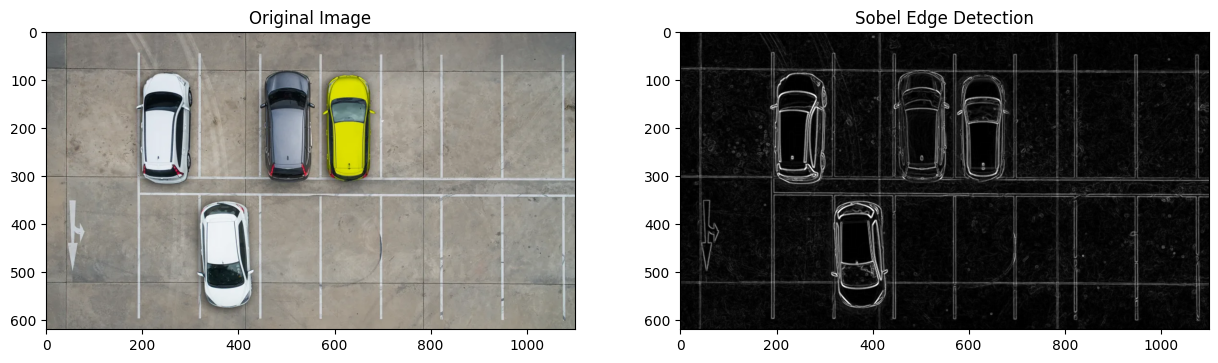

In [5]:
# Nomor 4 (a. Sobel Edge Detection)
img4 = cv.imread('/content/drive/MyDrive/PCVK/car-park.jpg')

# konversi ke skala abu-abu
gray = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

# hilangkan noise
img = cv.GaussianBlur(gray, (3,3), 0)

# dapatkan hasil filter Sobel horizontal dan vertical dari gambar
img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# gabungkan hasil filter Sobel horizontal dan vertical
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

# Plot Sobel Edge Detection
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
axarr[0].set_title('Original Image')
axarr[1].imshow(img_sobelxy, cmap='gray')
axarr[1].set_title('Sobel Edge Detection')
plt.show()

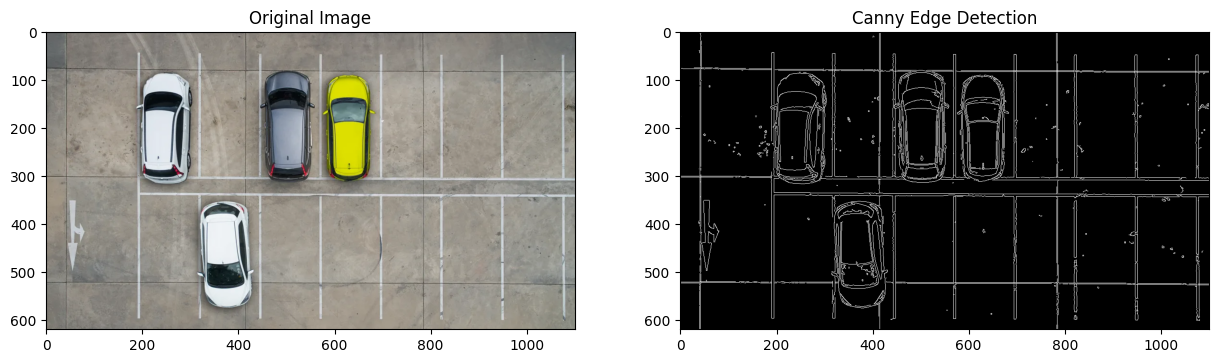

In [6]:
# Nomor 4 (b. Canny Edge Detection)
edged = cv.Canny(gray, 100, 200)

# Plot Canny Edge Detection
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
axarr[0].set_title('Original Image')
axarr[1].imshow(edged, cmap='gray')
axarr[1].set_title('Canny Edge Detection')
plt.show()

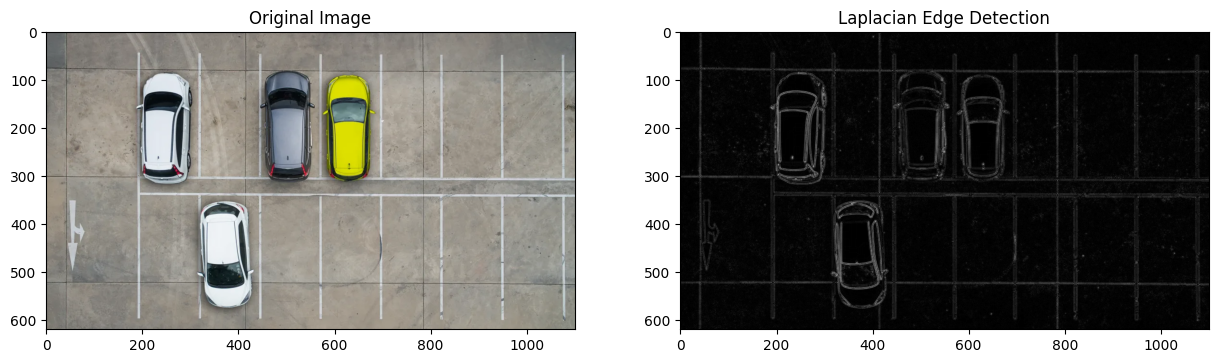

In [7]:
# Nomor 4 (c. Laplacian Edge Detection)
laplacian = cv.Laplacian(img, cv.CV_64F)
laplacian_abs = cv.convertScaleAbs(laplacian)

# Plot Laplacian Edge Detection
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
axarr[0].set_title('Original Image')
axarr[1].imshow(laplacian_abs, cmap='gray')
axarr[1].set_title('Laplacian Edge Detection')
plt.show()

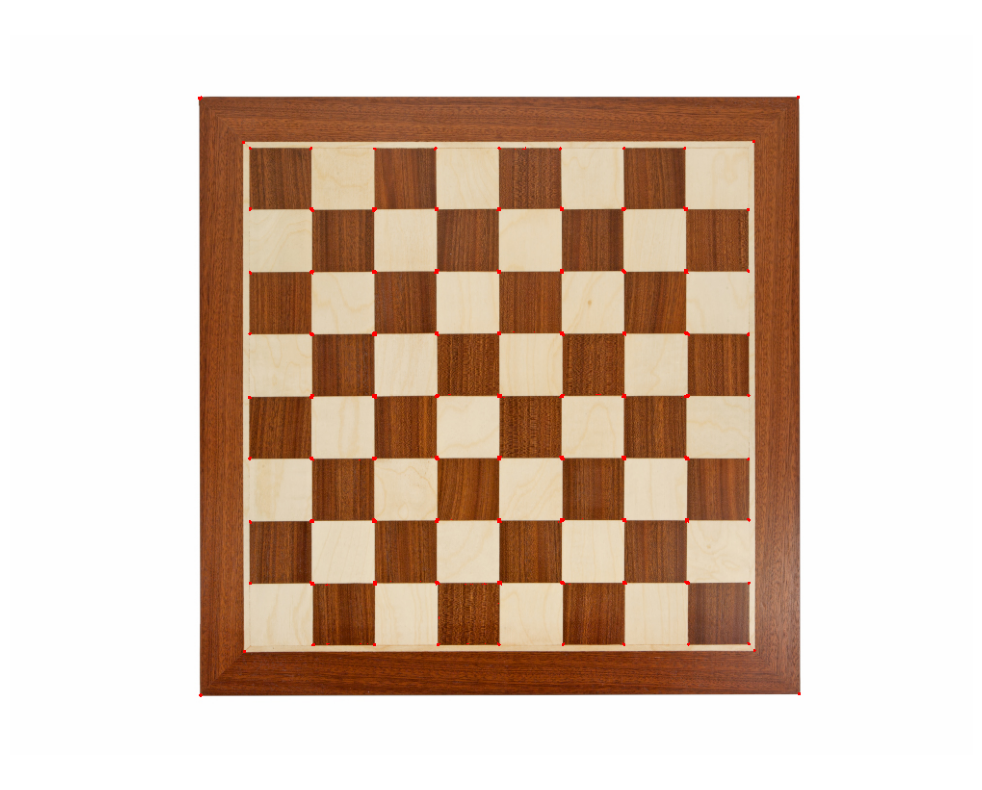

In [8]:
# Nomor 5 (a. Harris Corner Detection)
img5a = cv.imread('/content/drive/MyDrive/PCVK/chess-board.jpg')
gray_img = cv.cvtColor(img5a, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
img5a[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img5a, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

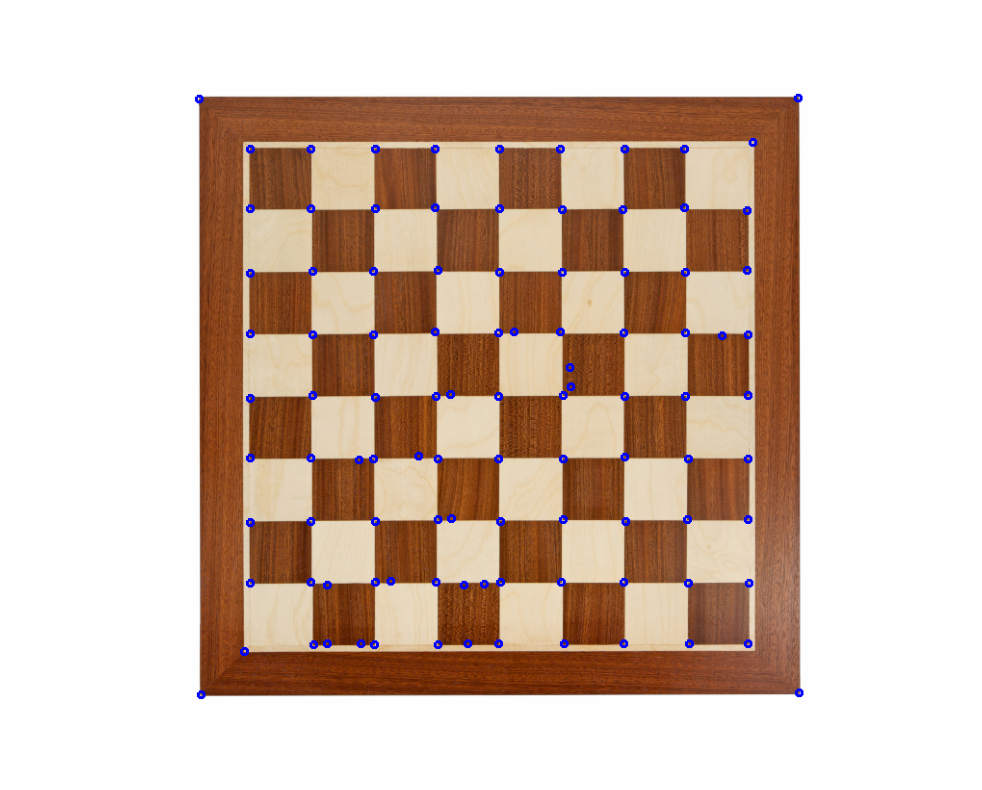

In [9]:
# Nomor 5 (b. Shi-Tomasi Detection)
img5b = cv.imread('/content/drive/MyDrive/PCVK/chess-board.jpg')
gray_img = cv.cvtColor(img5b, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10)
corners = np. int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img5b, (x,y),3,255,2)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img5b, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

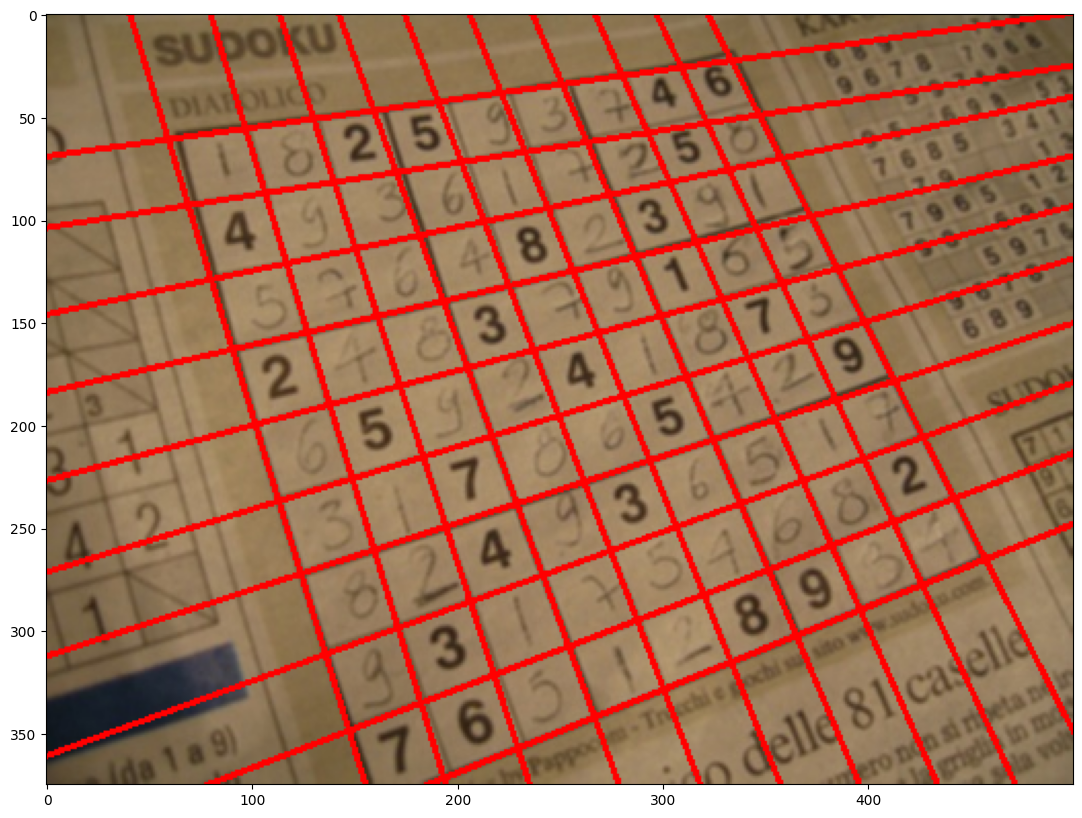

In [10]:
# Nomor 6
img6 = cv.imread('/content/drive/MyDrive/PCVK/sudoku.jpg')
img_gray = cv.cvtColor(img6, cv.COLOR_BGR2GRAY)

edges = cv.Canny(img_gray, 90, 150, apertureSize=3)

kernel_dilate = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel_dilate, iterations=1)

kernel_erode = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel_erode, iterations=1)

lines = cv.HoughLines(edges, 1, np.pi/180, 150)

if lines is None or len(lines) == 0:
    print('No lines were found')
    exit()

rho_threshold = 15
theta_threshold = 0.1

similar_lines = {i: [] for i in range(len(lines))}
for i in range(len(lines)):
    for j in range(len(lines)):
        if i == j:
            continue
        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

indices = [i for i in range(len(lines))]
indices.sort(key=lambda x: len(similar_lines[x]))

line_flags = len(lines) * [True]
for i in range(len(lines) - 1):
    if not line_flags[indices[i]]:
        continue
    for j in range(i + 1, len(lines)):
        if not line_flags[indices[j]]:
            continue
        rho_i, theta_i = lines[indices[i]][0]
        rho_j, theta_j = lines[indices[j]][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            line_flags[indices[j]] = False

filtered_lines = [lines[i] for i in range(len(lines)) if line_flags[i]]

for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv.line(img6, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(img6, cv.COLOR_BGR2RGB))
plt.show()

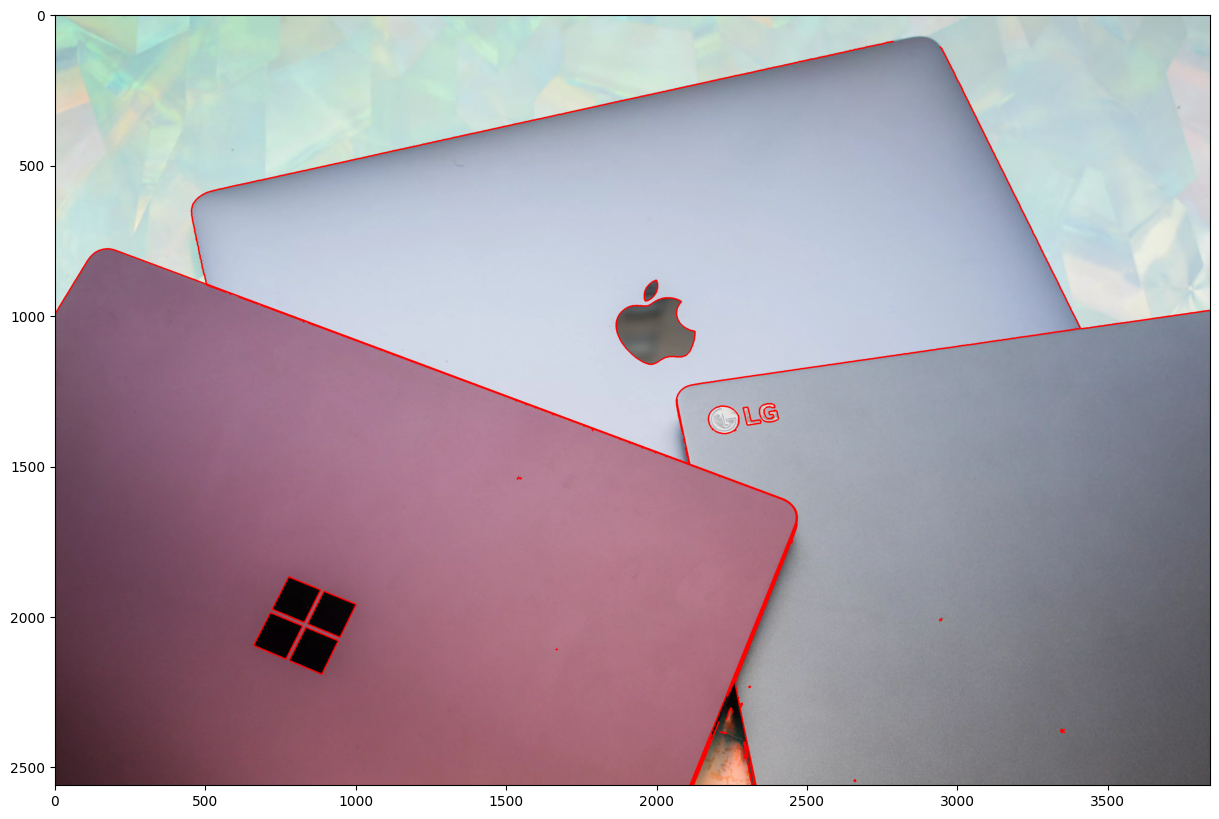

In [11]:
# Nomor 7
img7 = cv.imread('/content/drive/MyDrive/PCVK/laptop.jpg')
img_gray = cv.cvtColor(img7, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img7, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img7, cv.COLOR_BGR2RGB))
plt.show()